<a href="https://colab.research.google.com/github/rlatndnd9804/pdm03/blob/main/notebook/chap09_CNN_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CNN
- Conv2D
- Maxpolling2D

## mnist model

In [6]:
#Conv2D 
import tensorflow as tf
from tensorflow.keras import layers


input_shape = (4, 28, 28, 3) #4배치사이즈  28 by28   3은 채널
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu', input_shape=input_shape[1:])(x)
print(y.shape)
# padding='same'

input_shape = (100, 28, 28, 3)
input_shape[1:]
x = tf.random.normal(input_shape)
y = layers.Conv2D(128, 5, activation='relu',  #2는 뉴런,필터의 개수 3은 필터의 구조
			input_shape=input_shape[1:],padding='same')(x)
print(y.shape)
##number of filters = 32
x = tf.random.normal(input_shape)
y = layers.Conv2D(32, 3, activation='relu',  #2는 뉴런,필터의 개수 3은 필터의 구조
			input_shape=input_shape[1:],padding='same')(x)
print(y.shape)


(4, 26, 26, 2)
(100, 28, 28, 128)
(100, 28, 28, 32)


##polling

In [7]:
#Maxpolling2D
x = tf.constant([[1., 2., 3.],     [4., 5., 6.],     [7., 8., 9.]])
x = tf.reshape(x, [1, 3, 3, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), 
                                           strides=(1, 1), padding='valid')
print(max_pool_2d(x))

#pading = 'same'
x = tf.constant([[1., 2., 3.],     [4., 5., 6.],     [7., 8., 9.]])
x = tf.reshape(x, [1, 3, 3, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), 
                                           strides=(1, 1), padding='same')
print(max_pool_2d(x))



tf.Tensor(
[[[[5.]
   [6.]]

  [[8.]
   [9.]]]], shape=(1, 2, 2, 1), dtype=float32)
tf.Tensor(
[[[[5.]
   [6.]
   [6.]]

  [[8.]
   [9.]
   [9.]]

  [[8.]
   [9.]
   [9.]]]], shape=(1, 3, 3, 1), dtype=float32)


## CNN-mnist

In [5]:
# import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print(train_images.shape, train_labels.shape)
# 픽셀 값을 0~1 사이로 정규화한다. 
train_images, test_images = train_images / 255.0, test_images / 255.0


(60000, 28, 28, 1) (60000,)


In [7]:

#model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
keras.utils.plot_model(model, show_shapes=True)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

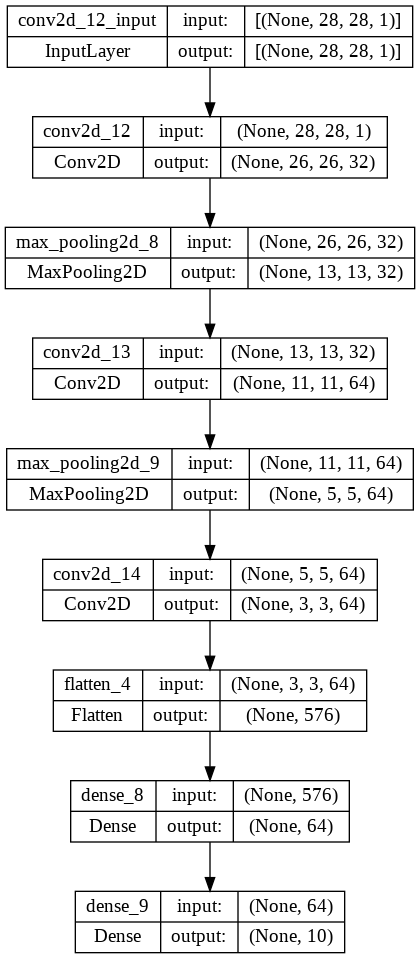

In [8]:
model.summary()
keras.utils.plot_model(model, show_shapes=True)



# [DIY] test 데이터에 모델 적용하고 정확도 계산



In [10]:
model.fit(train_images, train_labels, epochs=5)

## [DIY] test 데이터에 모델 적용하고 정확도 계산

model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0164 - accuracy: 0.9949
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0132 - accuracy: 0.9958
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0113 - accuracy: 0.9963
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0104 - accuracy: 0.9967
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0374 - accuracy: 0.9908


[0.0374043844640255, 0.9908000230789185]